# Séries Temporais
## Encontrar tendências, fazer prtevisões e manter controle
---
* Estuda o comportamento de uma variável contínua ao longo do tempo
    * Uma mesma variável analisada no decorrer do tempo
    * Relação no intervalo de tempo
    * O intervalo de tempo deve ser regular
    * Dependência da ordem
    * Não é possível analisar mais de uma amostra em um intervalo
* Estacionárias:
    * Flutuam em torno de uma mesma média e variância
* Não estacionárias:
    * Exibem trends, ciclos, padrões sazonais e outros comportamentos.
* Estocásticas:
    * Composta por um fator aleatório ue não pode ser explicado matematicamente.
* Determinísticas:
    * Explicaveis por meio de uma função.

## Componentes
## Podem ou não compor uma série temporal
---
* Tendência
* Sazonalidade
* Aleatoridade

In [3]:
#install.packages("forecast")

In [5]:
library(forecast)

# Dataset
---
* transporte de passageiros por via aérea nos EUA de 1949 a 1960

In [21]:
AirPassengers

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argumento formal "cols" corresponde a múltiplos argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . },

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [8]:
start(AirPassengers)

[1] 1949    1

In [10]:
end(AirPassengers)

[1] 1960   12

In [12]:
# A cada 12 intervalos o ciclo se repete
frequency(AirPassengers)

[1] 12

# Gráficos

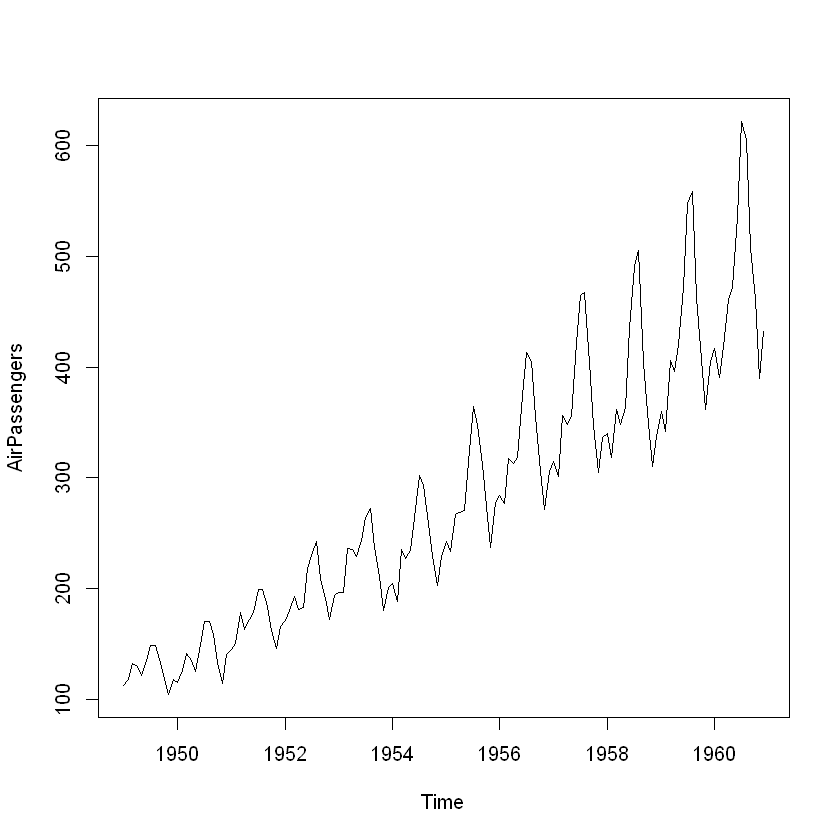

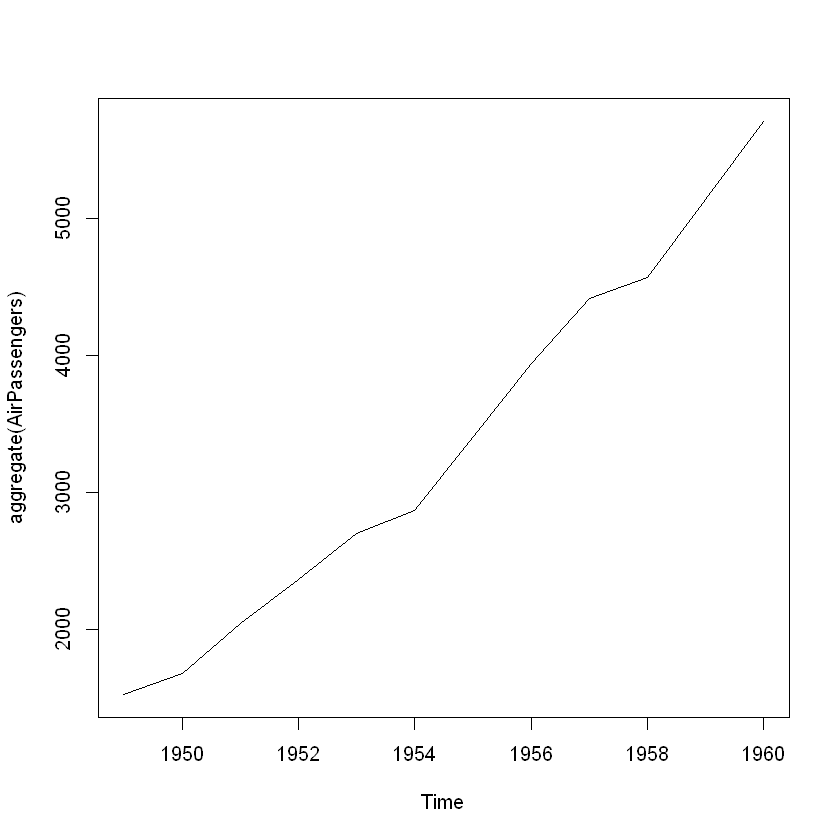

In [14]:
# Existe sazionalidade e tendência
plot(AirPassengers)
plot(aggregate(AirPassengers))

# Intervalos de uma série temporal

In [23]:
subst = window(AirPassengers, start=c(1960,1), end=c(1960,12))
subst

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

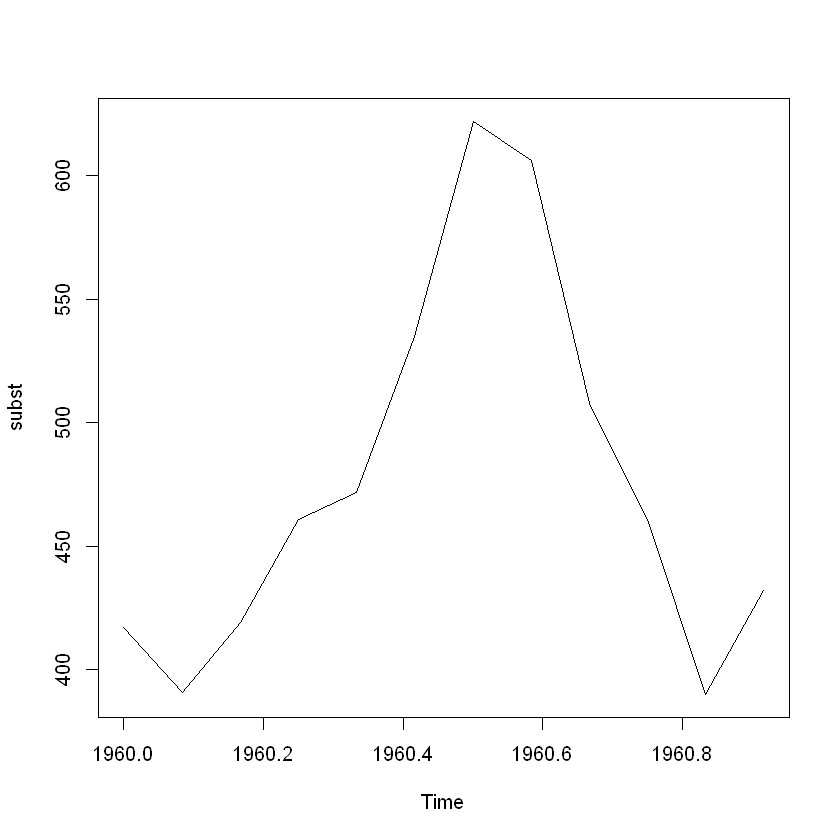

In [22]:
# Apenas um ano
plot(subst)

In [24]:
dec = decompose(AirPassengers)
dec

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1950 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1951 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1952 -24.7487

In [26]:
attributes(dec)
dec$seasonal

$names
[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"    

$class
[1] "decomposed.ts"

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argumento formal "cols" corresponde a múltiplos argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . },

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1950,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1951,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1952,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1953,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1954,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1955,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1956,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1957,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1958,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949


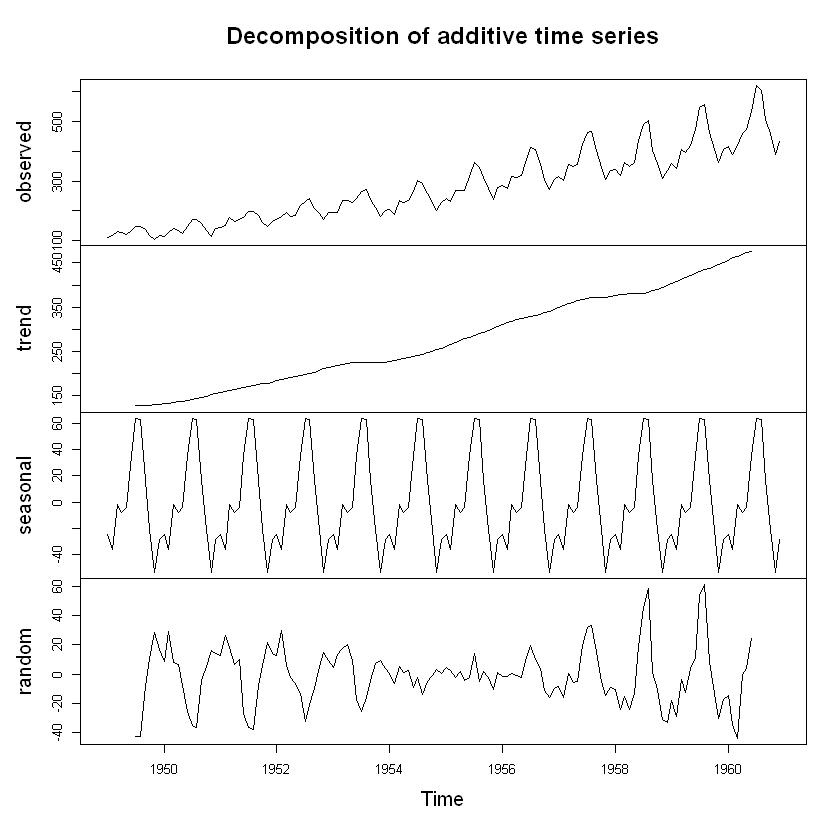

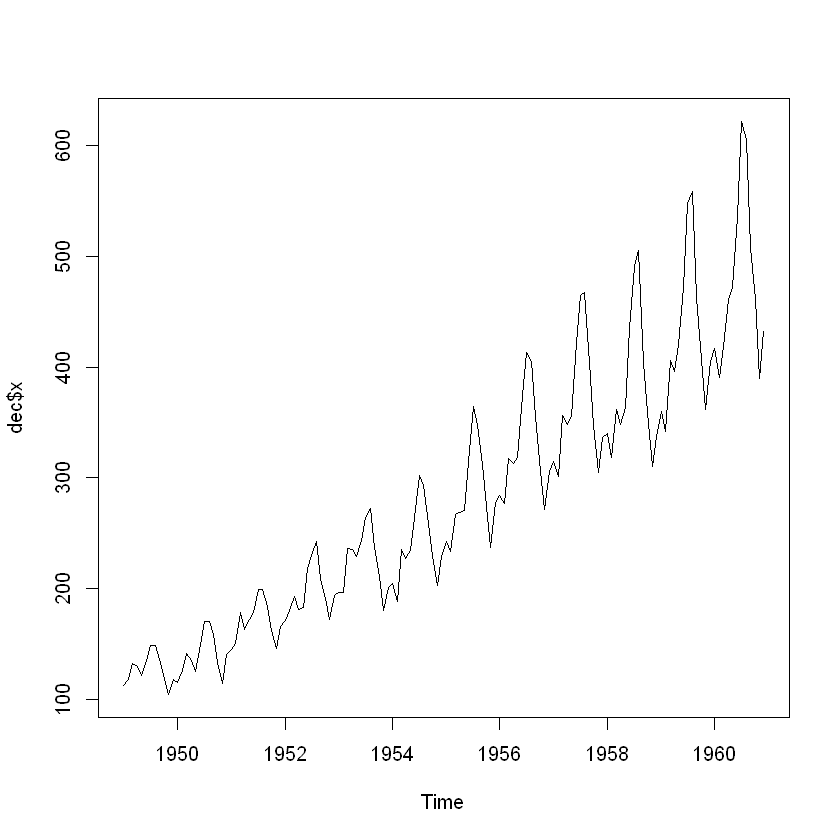

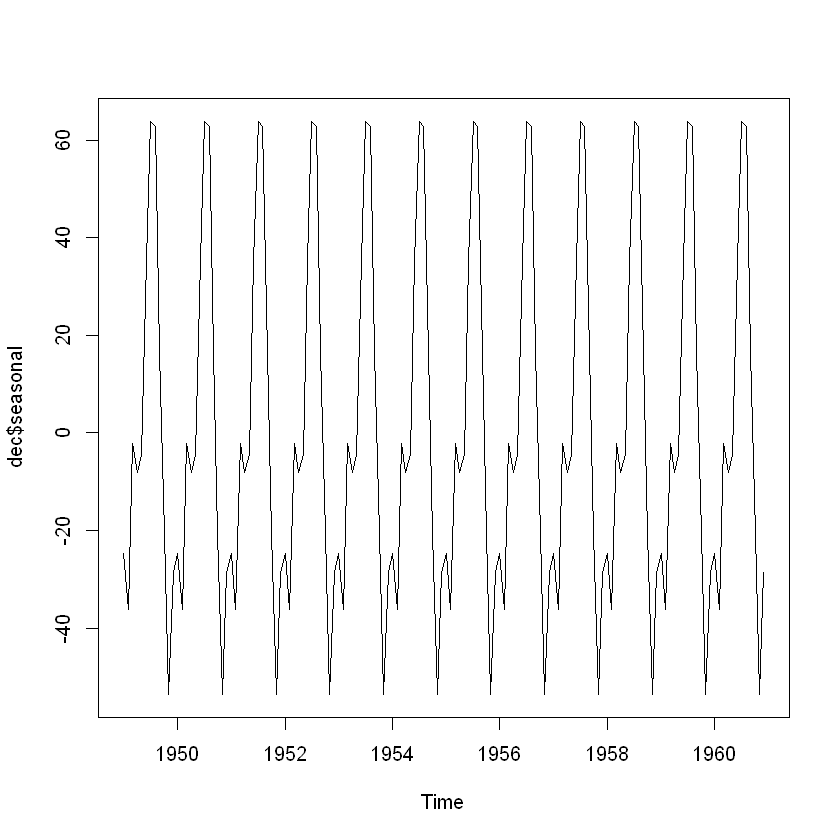

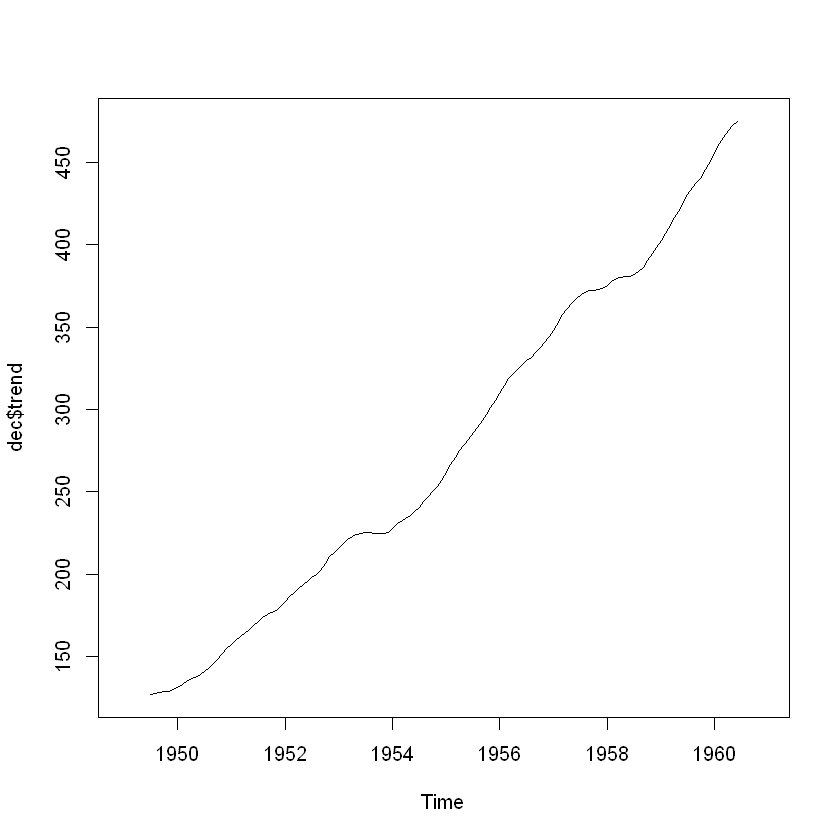

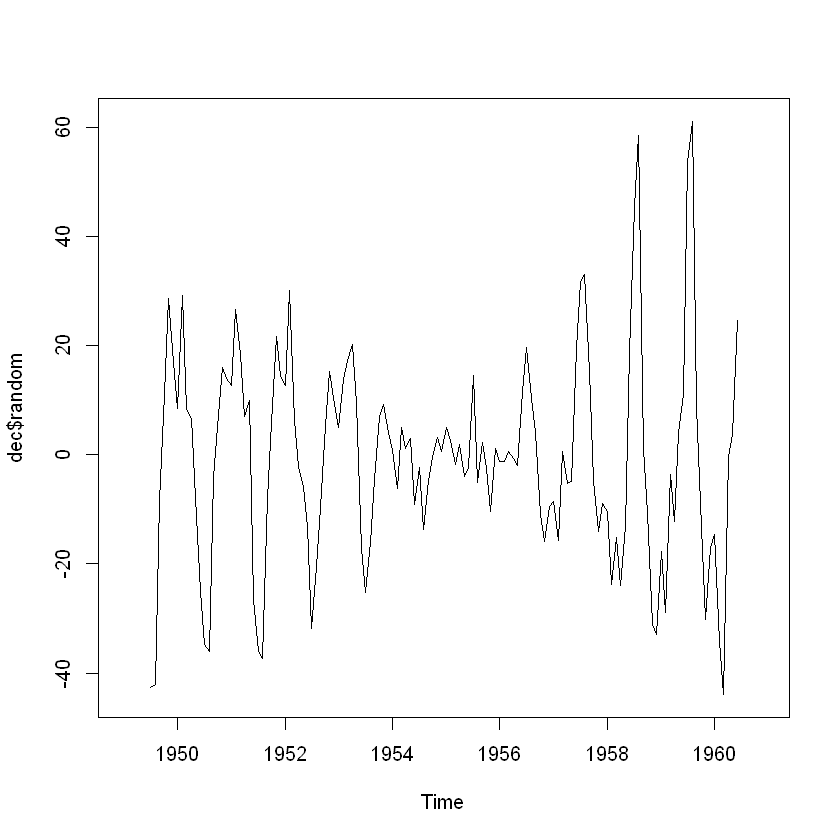

In [27]:
plot(dec)
plot(dec$x)
plot(dec$seasonal)
plot(dec$trend)
plot(dec$random)

# Previsões
---
* Suavização exponencial: as obsevações mais recentes tem influência maior sobre as previsões futuras
* Arima: dados estacionários

## Suavização Exponencial
* As obsevações mais recentes tem influência maior que as previsões futuras

In [28]:
ets = ets(AirPassengers)
ets

ETS(M,Ad,M) 

Call:
 ets(y = AirPassengers) 

  Smoothing parameters:
    alpha = 0.7096 
    beta  = 0.0204 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 120.9939 
    b = 1.7705 
    s = 0.8944 0.7993 0.9217 1.0592 1.2203 1.2318
           1.1105 0.9786 0.9804 1.011 0.8869 0.9059

  sigma:  0.0392

     AIC     AICc      BIC 
1395.166 1400.638 1448.623 

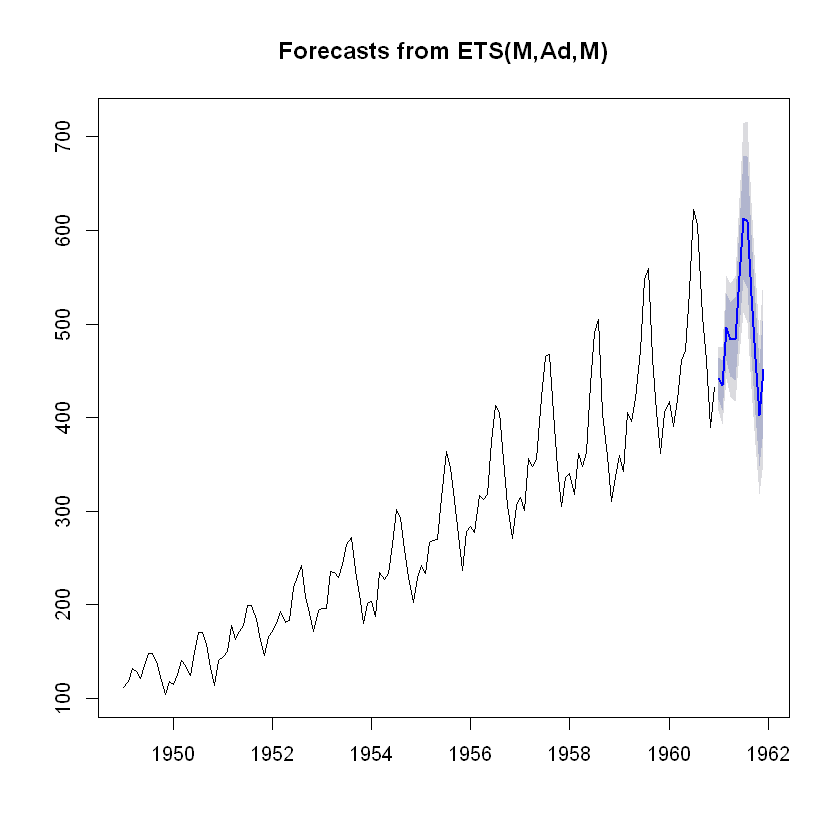

In [30]:
# Previsão: 12 meses para frente 
predict = forecast(ets,h=12)
plot(predict)

## Arima

In [31]:
arima = auto.arima(AirPassengers)
arima

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

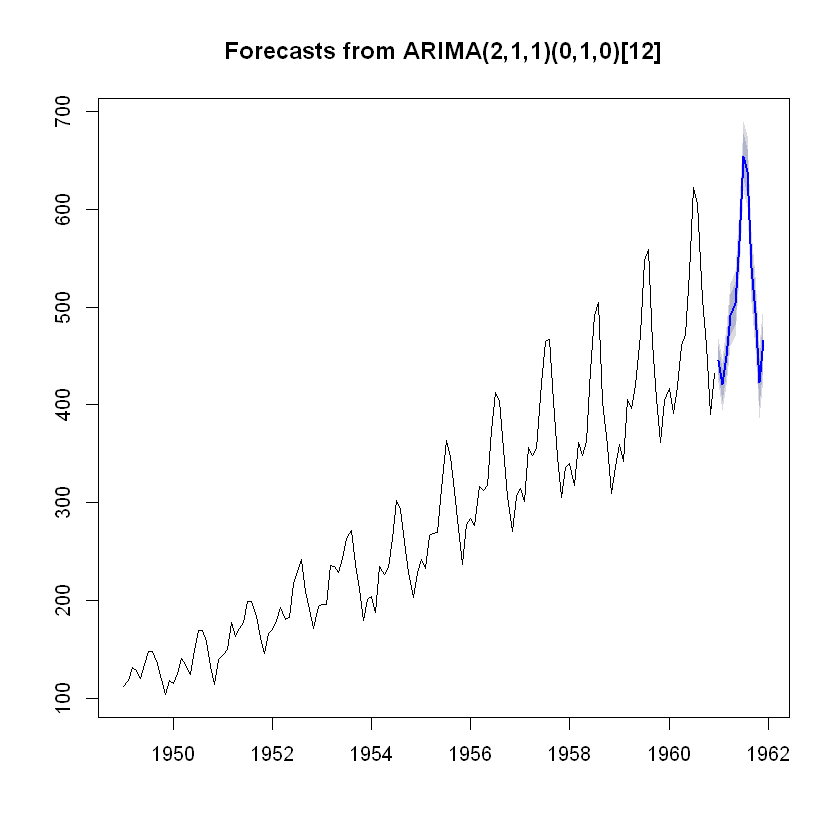

In [32]:
# Previsão
predict = forecast(arima, h=12)
plot(predict)